In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

## C-Cl molecule

Now, we will import our data for CCl molecule and try to use the velocity Verlet algorithm.

In [3]:
def derive(f,a,h):
    
    return (f(a+h) - f(a-h))/(2*h)


def create_interp(x,V):
    
    f = interpolate.interp1d(x,V,kind="cubic",fill_value="extrapolate")
    
    return f

In [4]:
def Verlet (x_V,V,m,x0,v0,tmax,dt):
    """
    Inputs
    ------
    x_v   : Spatial dependence of the potential   (type:list)
    V     : Potential                             (type:list)
    m     : Mass of the particle
    x0    : Initial position of the particle      (type:float)
    v0    : Initial velocity of the particle      (type:float)
    tmax  : Simulation time                       (type:float)
    dt    : Time step                             (type:float)
    
    This function returns the time evolution of the position, velocity, 
    and energy of a particle under an arbitrary position dependent potential.
    """
    
    t = 0
    x = x0
    v = v0
    V_int = create_interp(x_V,V)
    a = -derive(V_int,x,dt)/m
    pos = []
    vel = []
    energy = []
    time = []
    
    while(t<tmax):                     
        
                    
            x_prev = x
            x = x_prev + v*dt + 0.5*(dt)**2 * a
            a_prev = a
            a = -derive(V_int,x,dt)/m
            v_prev = v
            E = 0.5*v*v + V_int(x)
            v = v_prev + 0.5*(dt)*(a + a_prev)
            t = t + dt
            
            pos.append(x)
            vel.append(v)
            energy.append(0.0E)
            time.append(t)
            
            
        
        
    return(time,pos,vel,energy)             # return the solution

In [5]:
# the first column contains the position

x_data = np.loadtxt("myData.txt", delimiter=' ',skiprows=2)[:,0]       

# other columns contain energy values

E_data = [np.loadtxt("myData.txt", delimiter=' ',skiprows=2)[:,i] for i in range(1,8)]

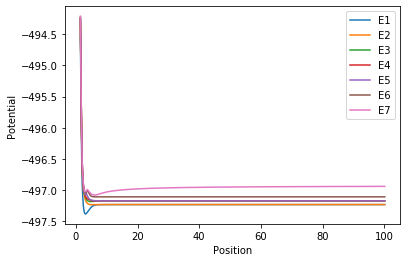

In [6]:
for i in range(len(E_data)): 
    
    plt.plot(x_data,E_data[i],label="E" + str(i+1))

plt.legend(loc='best')
plt.xlabel("Position")
plt.ylabel("Potential")
plt.show()

In [7]:
m_ccl = (35.453 * 12.0107)/(35.453 + 12.0107)

In [8]:
curve1 = Verlet(x_data,E_data[0],m_ccl,1,1,0.5,0.001)
#curve2 = Verlet(x_data,E_data[1],m_ccl,0,15,10,0.01)
#curve3 = Verlet(x_data,E_data[2],m_ccl,0,15,10,0.01)
#curve4 = Verlet(x_data,E_data[3],m_ccl,0,15,10,0.01)
#curve5 = Verlet(x_data,E_data[4],m_ccl,0,15,10,0.01)
#curve6 = Verlet(x_data,E_data[5],m_ccl,0,15,10,0.01)
#curve7 = Verlet(x_data,E_data[6],m_ccl,0,15,10,0.01)

TypeError: can't multiply sequence by non-int of type 'float'

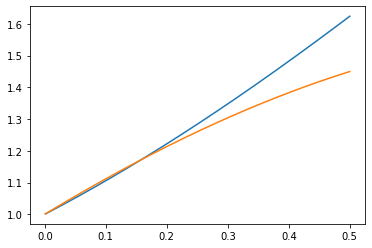

In [10]:
plt.plot(curve1[0],curve1[1],label='Position')
plt.plot(curve1[0],curve1[2],label='Position')
plt.plot(curve1[0],curve1[3],label='Position')
plt.legend(loc='best')
plt.xlabel('Time')
plt.grid()
plt.show()

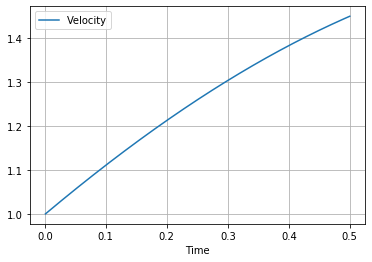

In [164]:
plt.plot(curve1[0],curve1[2],label='Velocity')
plt.legend(loc='best')
plt.xlabel('Time')
plt.grid()
plt.show()

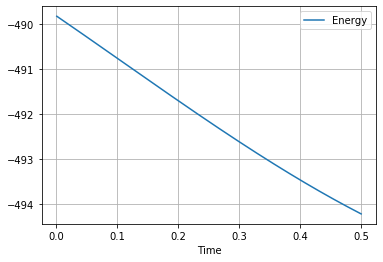

In [165]:
plt.plot(curve1[0],curve1[3],label='Energy')
plt.legend(loc='best')
plt.xlabel('Time')
plt.grid()
plt.show()